In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("data.xlsx", index_col= 'State')
data

,GDPin$millions,Population,Unemployment rate %
State,,,
North Dakota,52089,757952,2.4
Alabama,204861,4863300,3.8
Mississippi,107680,2988726,5.2
Arkansas,120689,2988248,3.5
Kansas,153258,2907289,3.8
Georgia,525360,10310371,4.5
Iowa,178766,3134693,3.2
West Virginia,73374,1831102,5.1
Kentucky,197043,4436974,5.2


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, North Dakota to Tennessee
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GDPin$millions       10 non-null     object 
 1   Population           10 non-null     int64  
 2   Unemployment rate %  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes
None


In above data, GDP is Dependant variable and population, Unemployment rate are independent variable

#### Our goal is to fit a linear model to the data so that we can predict the GDP of Tennessee, using a linear model

In [4]:
# We begin by centering and normalizing the data
import numpy as np
avg_Y = np.average(data['GDPin$millions'][0:9])
avg_x1 = np.average(data['Population'][0:9])
avg_x2 = np.average(data['Unemployment rate %'][0:9])

In [5]:
print(avg_Y, avg_x1, avg_x2)

179235.55555555556 3802072.777777778 4.077777777777778


In [6]:
std_Y = np.std(data['GDPin$millions'][0:9])
std_x1 = np.std(data['Population'][0:10])
std_x2 = np.std(data['Unemployment rate %'][0:10])

In [7]:
print(std_Y, std_x1, std_x2)

132233.70121376534 2586779.1891990104 0.9413288479590967


<Axes: xlabel='State'>

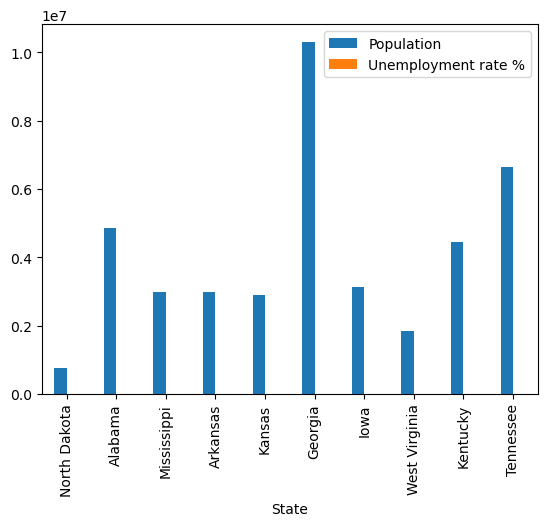

In [8]:
import matplotlib.pyplot as plt
data.plot(kind = 'bar')

## from above graph we can see data need to be Normalize

<Axes: xlabel='State'>

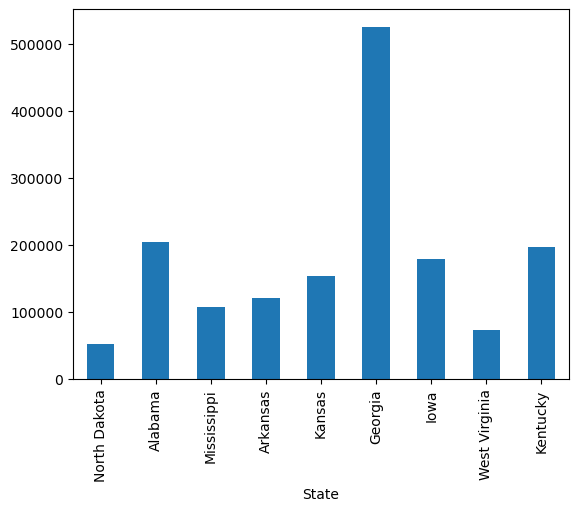

In [9]:
data['GDPin$millions'][0:9].plot(kind = 'bar')

<Axes: xlabel='State'>

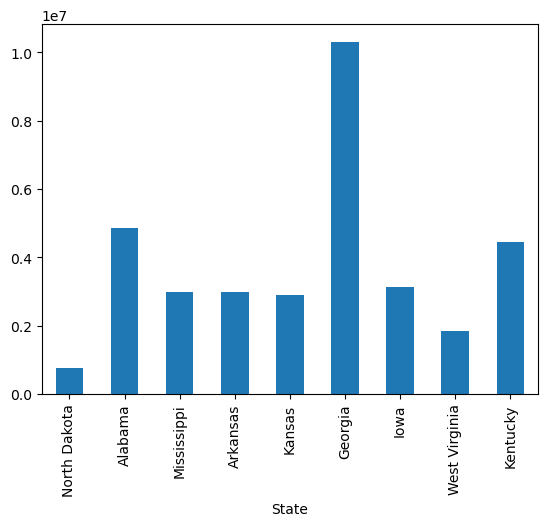

In [10]:
data['Population'][0:9].plot(kind = 'bar')

<Axes: xlabel='State'>

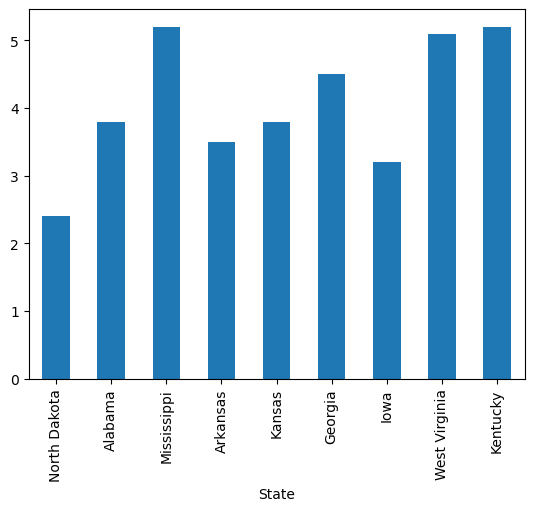

In [11]:
data['Unemployment rate %'][0:9].plot(kind = 'bar')

In [12]:
# # copy the data
# df_max_scaled = data[0:9].copy()
  
# # apply normalization techniques
# for column in df_max_scaled.columns:
#     df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
# NormData = df_max_scaled      
# # view normalized data
# display(NormData)

In [15]:
from sklearn import preprocessing
df_max_scaled = data[0:9].copy()

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(df_max_scaled)
NormData = pd.DataFrame(d, columns=data.columns)
print(NormData)

   GDPin$millions  Population  Unemployment rate %
0        0.000000    0.000000             0.000000
1        0.322800    0.429771             0.500000
2        0.117461    0.233530             1.000000
3        0.144949    0.233480             0.392857
4        0.213765    0.225004             0.500000
5        1.000000    1.000000             0.750000
6        0.267663    0.248810             0.285714
7        0.044974    0.112343             0.964286
8        0.306281    0.385140             1.000000


<Axes: >

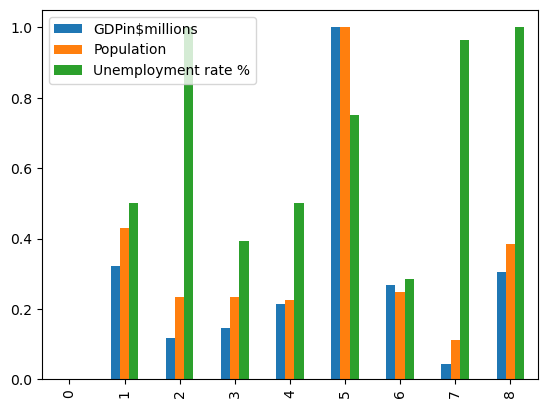

In [16]:
NormData.plot(kind = 'bar')

In [17]:
from sklearn import linear_model

X_var = NormData[['Population', 'Unemployment rate %']]
y_var = NormData[['GDPin$millions']]

regr = linear_model.LinearRegression()
regr.fit(X_var, y_var)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
# predictedCO2 = regr.predict([[2300, 1300]])

# print(predictedCO2)

LinearRegression()

In [26]:
predicted_GDP = regr.predict([[0.385140, 1.000000]])
predicted_GDP[0, 0]

C:\Users\ajitw\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.30160364704320947

In [33]:
def DeNormGDP(Norm_val):
    Norm_val = Norm_val
    maxV = data['GDPin$millions'][0:9].max()
    minV= data['GDPin$millions'][0:9].min()
    denorm = Norm_val*(maxV - minV ) + minV
    return denorm

In [35]:
DeNormGDP(predicted_GDP[0, 0])

194829.2596397868

### Predicted GDP Per million = 194829.2596397868